In [1]:
%run py_import.py

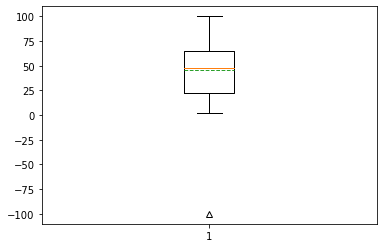

In [7]:
data = np.random.rand(100)*100 # 100个0-100的随机数
data = np.append(data,np.array([-100,100]))
plt.boxplot(data,sym = '^',meanline = True, showmeans = True)
plt.show()

In [21]:
athletes = pd.read_csv('athlete_events.csv')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


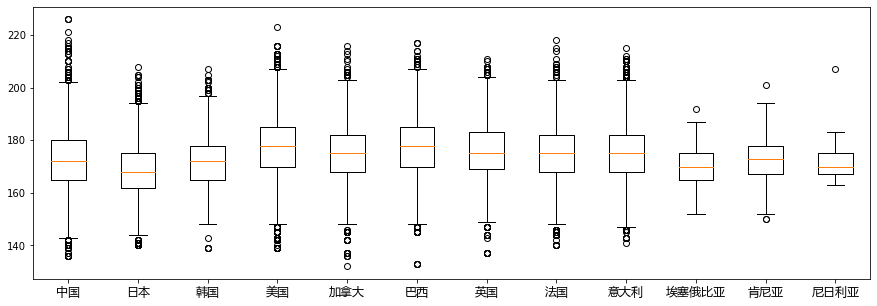

In [23]:
countries = {
    'CHN':'中国',
    'JPN':"日本",
    'KOR':'韩国',
    'USA':"美国",
    'CAN':"加拿大",
    'BRA':"巴西",
    'GBR':"英国",
    'FRA':"法国",
    'ITA':"意大利",
    'ETH':"埃塞俄比亚",
    'KEN':"肯尼亚",
    'NIG':"尼日利亚",
}
dfs = []
for code in countries.keys():
    df = athletes[athletes['NOC'] == code]['Height'].dropna()
    dfs.append(df)
plt.figure(figsize = (15,5))
plt.boxplot(dfs)
plt.xticks(range(1,13),countries.values(),fontproperties = font)
plt.show()

In [26]:
athletes[athletes['NOC'] == 'CHN'].sort_values('Height',ascending = False).head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
265041,132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN
265042,132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
269053,134621,Zhang Zhaoxu,M,24.0,221.0,110.0,China,CHN,2012 Summer,2012,Summer,London,Basketball,Basketball Men's Basketball,NaN
138228,69452,Li Muhao,M,24.0,218.0,115.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,NaN


### 笔记：
1. 箱线图的绘制方法是：先找出一组数据的上限值、下限值、中位数（Q2）和下四分位数（Q1）以及上四分位数（Q3）；然后，连接两个四分位数画出箱子；再将最大值和最小值与箱子相连接，中位数在箱子中间。
2. 使用`matplotlib.pyplot.boxplot`来绘制，这个上面有一些常用的参数：
    * `x`：需要绘制的箱线图的数据
    *  `notch`：是否展示置信区间，默认是`False`。如果设置为`True`，那么就会在盒子上展示一个缺口
    * `sym`：代表异常点的符号表示，默认是小圆点
    * `vert`：是否是垂直的，默认是`True`，如果设置为`False`那么将水平方向展示
    * `whis`：上下限的系数，默认是`1.5`，也就是上限是`Q3+1.5IQR`，可以改成其他的。也可以为一个序列，如果是序列，那么序列中的两个值分别代表的就是下限和上限的值，而不是再需要通过`IQR`来计算
    * `positions`：设置每个盒子的位置
    * `widths`：设置每个盒子的宽度
    * `labels`：每个盒子的`label`
    * `meanline`和`showmeans`：如果这两个都为`True`，那么将会绘制平均值的的线条